In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
def prep_heat_map_dfs(metric_name):
    mean_heat_map = []
    for p_i in [2,8,16,32]:
        #print("#############################p_i="+str(p_i))
        for s_i in [3,6,10,15,30,45,60,120]:
            #print("###########s_i="+str(s_i))
            temp_heat_map = pd.read_csv(
                "experiment_results/heat_map_data/Xy_N_6000_hm_"+metric_name+"_plot_data_"+
                str(p_i)+
                "_x_20_1000_x_30_6000_x_"+
                str(s_i)+".csv"
            )
            #print(temp_heat_map)
            temp_heat_map = temp_heat_map[["20","100","1000"]]
            new_col_names = ["p="+str(p_i)+"_s="+str(s_i)+"_pn="+ x for x in ["20","100","1000"]]
            temp_heat_map.columns = new_col_names
            mean_heat_map.append(temp_heat_map)
    mean_results = pd.concat(mean_heat_map, axis=1)
    mean_results['index'] = [30,150,300,600,1200,6000]
    mean_results = mean_results.set_index(['index'], drop=True)
     
    return(mean_results)

In [49]:
names_part_num_20 = [
    '_s=3_pn=20',
    '_s=6_pn=20',
    #'_s=10_pn=20',
    '_s=15_pn=20',
    '_s=30_pn=20',
    '_s=45_pn=20',
    '_s=60_pn=20',
    '_s=120_pn=20',
]
names_part_num_100 = [
    '_s=3_pn=100',
    '_s=6_pn=100',
    #'_s=10_pn=100',
    '_s=15_pn=100',
    '_s=30_pn=100',
    '_s=45_pn=100',
    '_s=60_pn=100',
    '_s=120_pn=100',
]
names_part_num_1000 = [
    '_s=3_pn=1000',
    '_s=6_pn=1000',
    #'_s=10_pn=1000',
    '_s=15_pn=1000',
    '_s=30_pn=1000',
    '_s=45_pn=1000',
    '_s=60_pn=1000',
    '_s=120_pn=1000',
]

shards_for_plots = [3,6,15, 30,45,60,120]#[3,6,10,15,30,45,60,120]
comm_freq = ([30/6000,150/6000,300/6000,600/6000,1200/6000,6000/6000])

symbols_6 = [':o',':<', ':>', ':v', ':x', ':+', ':*',':d']

In [50]:
print("############################################################ MEAN")
mean = prep_heat_map_dfs(metric_name="mean_estimate")
print("############################################################ STD")
std = prep_heat_map_dfs(metric_name="std_estimate")

print("############################################################ ART")
adj_rt = prep_heat_map_dfs(metric_name="mean_adjusted_run_time")

print("############################################################ PFT MEAN")
pf_rt = prep_heat_map_dfs(metric_name="mean_pf_run_time")
print("############################################################ PFT STD")
pf_rt_std = prep_heat_map_dfs(metric_name="std_pf_run_time")

print("############################################################ PCT")
pc_t = prep_heat_map_dfs(metric_name="particle_comm_time_mean")
print("############################################################ PCT STD")
pc_t_std = prep_heat_map_dfs(metric_name="particle_comm_time_std")

#print("############################################################ TRT")
#r_t = prep_heat_map_dfs(metric_name="total_run_time_mean")

############################################################ MEAN
############################################################ STD
############################################################ ART
############################################################ PFT MEAN
############################################################ PFT STD
############################################################ PCT
############################################################ PCT STD


In [51]:
print(mean.isnull().sum().sum())
print(std.isnull().sum().sum())
print(adj_rt.isnull().sum().sum())
print(pf_rt.isnull().sum().sum())
#print(pc_t.isnull().sum().sum())

0
0
0
0


In [52]:
diffs_32_pn_20 = mean[["p=32" + x for x in names_part_num_20]]
diffs_32_pn_100 = mean[["p=32" + x for x in names_part_num_100]]
diffs_32_pn_1000 = mean[["p=32" + x for x in names_part_num_1000]]

sterr_32_pn_20 = std[["p=32" + x for x in names_part_num_20]]
sterr_32_pn_100 = std[["p=32" + x for x in names_part_num_100]]
sterr_32_pn_1000 = std[["p=32" + x for x in names_part_num_1000]]

rt_32_pn_20 = adj_rt[["p=32" + x for x in names_part_num_20]]
rt_32_pn_100 = adj_rt[["p=32" + x for x in names_part_num_100]]
rt_32_pn_1000 = adj_rt[["p=32" + x for x in names_part_num_1000]]

pfrt_32_pn_20 = pf_rt[["p=32" + x for x in names_part_num_20]]
pfrt_32_pn_100 = pf_rt[["p=32" + x for x in names_part_num_100]]
pfrt_32_pn_1000 = pf_rt[["p=32" + x for x in names_part_num_1000]]

pfrt_std_32_pn_20 = pf_rt_std[["p=32" + x for x in names_part_num_20]]
pfrt_std_32_pn_100 = pf_rt_std[["p=32" + x for x in names_part_num_100]]
pfrt_std_32_pn_1000 = pf_rt_std[["p=32" + x for x in names_part_num_1000]]

pct_32_pn_20 = pc_t[["p=32" + x for x in names_part_num_20]]
pct_32_pn_100 = pc_t[["p=32" + x for x in names_part_num_100]]
pct_32_pn_1000 = pc_t[["p=32" + x for x in names_part_num_1000]]

pct_std_32_pn_20 = pc_t_std[["p=32" + x for x in names_part_num_20]]
pct_std_32_pn_100 = pc_t_std[["p=32" + x for x in names_part_num_100]]
pct_std_32_pn_1000 = pc_t_std[["p=32" + x for x in names_part_num_1000]]

diffs_16_pn_20 = mean[["p=16" + x for x in names_part_num_20]]
diffs_16_pn_100 = mean[["p=16" + x for x in names_part_num_100]]
diffs_16_pn_1000 = mean[["p=16" + x for x in names_part_num_1000]]

sterr_16_pn_20 = std[["p=16" + x for x in names_part_num_20]]
sterr_16_pn_100 = std[["p=16" + x for x in names_part_num_100]]
sterr_16_pn_1000 = std[["p=16" + x for x in names_part_num_1000]]

rt_16_pn_20 = adj_rt[["p=16" + x for x in names_part_num_20]]
rt_16_pn_100 = adj_rt[["p=16" + x for x in names_part_num_100]]
rt_16_pn_1000 = adj_rt[["p=16" + x for x in names_part_num_1000]]

pfrt_16_pn_20 = pf_rt[["p=16" + x for x in names_part_num_20]]
pfrt_16_pn_100 = pf_rt[["p=16" + x for x in names_part_num_100]]
pfrt_16_pn_1000 = pf_rt[["p=16" + x for x in names_part_num_1000]]

pfrt_std_16_pn_20 = pf_rt_std[["p=16" + x for x in names_part_num_20]]
pfrt_std_16_pn_100 = pf_rt_std[["p=16" + x for x in names_part_num_100]]
pfrt_std_16_pn_1000 = pf_rt_std[["p=16" + x for x in names_part_num_1000]]

pct_16_pn_20 = pc_t[["p=16" + x for x in names_part_num_20]]
pct_16_pn_100 = pc_t[["p=16" + x for x in names_part_num_100]]
pct_16_pn_1000 = pc_t[["p=16" + x for x in names_part_num_1000]]

pct_std_16_pn_20 = pc_t_std[["p=16" + x for x in names_part_num_20]]
pct_std_16_pn_100 = pc_t_std[["p=16" + x for x in names_part_num_100]]
pct_std_16_pn_1000 = pc_t_std[["p=16" + x for x in names_part_num_1000]]

diffs_8_pn_20 = mean[["p=8" + x for x in names_part_num_20]]
diffs_8_pn_100 = mean[["p=8" + x for x in names_part_num_100]]
diffs_8_pn_1000 = mean[["p=8" + x for x in names_part_num_1000]]

sterr_8_pn_20 = std[["p=8" + x for x in names_part_num_20]]
sterr_8_pn_100 = std[["p=8" + x for x in names_part_num_100]]
sterr_8_pn_1000 = std[["p=8" + x for x in names_part_num_1000]]

rt_8_pn_20 = adj_rt[["p=8" + x for x in names_part_num_20]]
rt_8_pn_100 = adj_rt[["p=8" + x for x in names_part_num_100]]
rt_8_pn_1000 = adj_rt[["p=8" + x for x in names_part_num_1000]]

pfrt_8_pn_20 = pf_rt[["p=8" + x for x in names_part_num_20]]
pfrt_8_pn_100 = pf_rt[["p=8" + x for x in names_part_num_100]]
pfrt_8_pn_1000 = pf_rt[["p=8" + x for x in names_part_num_1000]]

pfrt_std_8_pn_20 = pf_rt_std[["p=8" + x for x in names_part_num_20]]
pfrt_std_8_pn_100 = pf_rt_std[["p=8" + x for x in names_part_num_100]]
pfrt_std_8_pn_1000 = pf_rt_std[["p=8" + x for x in names_part_num_1000]]

pct_8_pn_20 = pc_t[["p=8" + x for x in names_part_num_20]]
pct_8_pn_100 = pc_t[["p=8" + x for x in names_part_num_100]]
pct_8_pn_1000 = pc_t[["p=8" + x for x in names_part_num_1000]]

pct_std_8_pn_20 = pc_t_std[["p=8" + x for x in names_part_num_20]]
pct_std_8_pn_100 = pc_t_std[["p=8" + x for x in names_part_num_100]]
pct_std_8_pn_1000 = pc_t_std[["p=8" + x for x in names_part_num_1000]]

diffs_2_pn_20 = mean[["p=2" + x for x in names_part_num_20]]
diffs_2_pn_100 = mean[["p=2" + x for x in names_part_num_100]]
diffs_2_pn_1000 = mean[["p=2" + x for x in names_part_num_1000]]

sterr_2_pn_20 = std[["p=2" + x for x in names_part_num_20]]
sterr_2_pn_100 = std[["p=2" + x for x in names_part_num_100]]
sterr_2_pn_1000 = std[["p=2" + x for x in names_part_num_1000]]

rt_2_pn_20 = adj_rt[["p=2" + x for x in names_part_num_20]]
rt_2_pn_100 = adj_rt[["p=2" + x for x in names_part_num_100]]
rt_2_pn_1000 = adj_rt[["p=2" + x for x in names_part_num_1000]]

pfrt_2_pn_20 = pf_rt[["p=2" + x for x in names_part_num_20]]
pfrt_2_pn_100 = pf_rt[["p=2" + x for x in names_part_num_100]]
pfrt_2_pn_1000 = pf_rt[["p=2" + x for x in names_part_num_1000]]

pfrt_std_2_pn_20 = pf_rt_std[["p=2" + x for x in names_part_num_20]]
pfrt_std_2_pn_100 = pf_rt_std[["p=2" + x for x in names_part_num_100]]
pfrt_std_2_pn_1000 = pf_rt_std[["p=2" + x for x in names_part_num_1000]]

pct_2_pn_20 = pc_t[["p=2" + x for x in names_part_num_20]]
pct_2_pn_100 = pc_t[["p=2" + x for x in names_part_num_100]]
pct_2_pn_1000 = pc_t[["p=2" + x for x in names_part_num_1000]]

pct_std_2_pn_20 = pc_t_std[["p=2" + x for x in names_part_num_20]]
pct_std_2_pn_100 = pc_t_std[["p=2" + x for x in names_part_num_100]]
pct_std_2_pn_1000 = pc_t_std[["p=2" + x for x in names_part_num_1000]]

In [53]:
def get_log_UL_bounds(mean_df, std_df, n_sterror):
    """create the DF that has the range with n_sterror*standard error for each cell"""
    log_upper = np.log(mean_df + std_df * n_sterror)
    log_lower = np.log(mean_df - std_df * n_sterror)
    error_df = log_upper - log_lower
    return error_df

In [54]:
diffs_32_pn_1000

,p=32_s=3_pn=1000,p=32_s=6_pn=1000,p=32_s=15_pn=1000,p=32_s=30_pn=1000,p=32_s=45_pn=1000,p=32_s=60_pn=1000,p=32_s=120_pn=1000
index,,,,,,,
30,0.808956,0.779902,0.756619,0.770394,0.756624,0.747042,0.699384
150,0.801719,0.792533,0.770699,0.737334,0.726193,0.727006,0.691078
300,0.804503,0.797685,0.769418,0.744098,0.727784,0.715506,0.692415
600,0.805377,0.796985,0.775094,0.741758,0.721033,0.707975,0.683643
1200,0.806849,0.796699,0.767096,0.735523,0.703011,0.694506,0.662464
6000,0.801978,0.790693,0.764161,0.727591,0.685912,0.672103,0.623261


In [55]:
get_log_UL_bounds(pct_32_pn_1000, pct_std_32_pn_1000, 3)

,p=32_s=3_pn=1000,p=32_s=6_pn=1000,p=32_s=15_pn=1000,p=32_s=30_pn=1000,p=32_s=45_pn=1000,p=32_s=60_pn=1000,p=32_s=120_pn=1000
index,,,,,,,
30,0.215305,0.193674,0.118894,0.085183,0.027895,0.005311,0.012323
150,0.343276,0.175535,0.382056,0.092232,0.066564,0.017005,0.020134
300,0.408567,0.427237,0.178104,0.126290,0.134924,0.205103,0.022497
600,0.154048,0.366219,0.231092,0.129607,0.128247,0.038249,0.047462
1200,0.178804,0.571015,0.266461,0.415010,0.097110,0.129857,0.058657
6000,1.009339,0.617395,0.188866,0.149641,0.153929,0.306892,0.113411


In [56]:
pfrt_32_pn_1000

,p=32_s=3_pn=1000,p=32_s=6_pn=1000,p=32_s=15_pn=1000,p=32_s=30_pn=1000,p=32_s=45_pn=1000,p=32_s=60_pn=1000,p=32_s=120_pn=1000
index,,,,,,,
30,2282.245852,2252.526013,2207.814419,2142.231456,1558.319987,1215.159572,582.386495
150,2062.920121,2219.447362,2175.442736,2110.224690,1254.602286,1113.784181,634.779040
300,2061.994534,2052.924600,2171.921330,2112.981619,1210.398879,1081.947267,605.616485
600,2210.183191,2035.495060,1996.107323,2089.104450,1190.620881,1060.570869,597.338135
1200,2090.505456,2037.262584,2000.124029,1947.825008,1174.970275,1043.938372,587.836851
6000,2084.819000,2062.160600,2028.810071,1969.374000,1095.059909,972.832983,544.786706


In [57]:
pct_32_pn_1000

,p=32_s=3_pn=1000,p=32_s=6_pn=1000,p=32_s=15_pn=1000,p=32_s=30_pn=1000,p=32_s=45_pn=1000,p=32_s=60_pn=1000,p=32_s=120_pn=1000
index,,,,,,,
30,110.643653,187.381277,284.432973,357.275716,1749.953417,2029.660500,3170.283521
150,40.429606,101.145231,181.071136,237.176839,809.856687,585.545745,645.244448
300,42.057092,64.607662,321.141189,334.453267,594.910344,364.834088,319.122312
600,345.800990,68.072518,91.744788,187.193812,455.701117,267.845727,144.684351
1200,106.898731,64.781354,85.441876,135.015397,374.457968,199.646963,114.344870
6000,32.330000,59.903800,102.098286,129.299966,269.208750,87.224932,58.770462


In [58]:
get_log_UL_bounds(pfrt_32_pn_1000, pfrt_std_32_pn_1000, 3)

,p=32_s=3_pn=1000,p=32_s=6_pn=1000,p=32_s=15_pn=1000,p=32_s=30_pn=1000,p=32_s=45_pn=1000,p=32_s=60_pn=1000,p=32_s=120_pn=1000
index,,,,,,,
30,0.010257,0.004848,0.006897,0.006490,0.006057,0.005201,0.006114
150,0.011671,0.013855,0.007365,0.007523,0.013971,0.010148,0.006458
300,0.010567,0.006605,0.007723,0.005014,0.010905,0.004940,0.006515
600,0.024746,0.007728,0.005827,0.003349,0.008993,0.009163,0.008696
1200,0.006100,0.011553,0.008188,0.006689,0.011341,0.011252,0.008683
6000,0.012758,0.009961,0.005431,0.004161,0.011546,0.013350,0.007662


In [59]:
get_log_UL_bounds(
    pfrt_32_pn_1000+pct_32_pn_1000, 
    np.sqrt(pfrt_std_32_pn_1000**2+pct_std_32_pn_1000**2), 3)

,p=32_s=3_pn=1000,p=32_s=6_pn=1000,p=32_s=15_pn=1000,p=32_s=30_pn=1000,p=32_s=45_pn=1000,p=32_s=60_pn=1000,p=32_s=120_pn=1000
index,,,,,,,
30,0.013930,0.015489,0.014867,0.013380,0.015028,0.003851,0.010453
150,0.013180,0.015292,0.029793,0.011509,0.027450,0.008864,0.010643
300,0.013120,0.014349,0.023852,0.017771,0.045000,0.051684,0.008859
600,0.029843,0.013903,0.011543,0.011079,0.036045,0.010629,0.011603
1200,0.010437,0.020469,0.013395,0.027252,0.024979,0.022862,0.012001
6000,0.018979,0.019472,0.010399,0.009997,0.031702,0.027892,0.013020


In [60]:
np.sqrt(pfrt_std_32_pn_1000**2 + pct_std_32_pn_1000**2)

,p=32_s=3_pn=1000,p=32_s=6_pn=1000,p=32_s=15_pn=1000,p=32_s=30_pn=1000,p=32_s=45_pn=1000,p=32_s=60_pn=1000,p=32_s=120_pn=1000
index,,,,,,,
30,5.555441,6.298303,6.175201,5.573737,8.286125,2.082484,6.538027
150,4.620325,5.914275,11.700494,4.502727,9.444374,2.510456,2.270444
300,4.600774,5.064015,9.910139,7.248713,13.537666,12.459791,1.365304
600,12.712134,4.874180,4.016666,4.202984,9.889341,2.353244,1.434892
1200,3.822495,7.170982,4.656068,9.459642,6.450222,4.738200,1.404492
6000,6.696765,6.886743,3.693186,3.496582,7.207802,4.927571,1.309719


### Estimated Likelihood vs Shard Number

In [61]:
#
#index = rt_2_pn_20.index.values
#plot_names_part_num_20 = ["p=2" + x for x in names_part_num_20]
#plot_names_part_num_100 = ["p=2" + x for x in names_part_num_100]
#plot_names_part_num_1000 = ["p=2" + x for x in names_part_num_1000]
#
#fig = plt.figure(figsize=(20,10))
#ax1 = fig.add_subplot(3, 2, 1)
#for i in range(len(index)):
#    plt.plot(
#        shards_for_plots, 
#        diffs_2_pn_20.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=2, pn=20")
#_=plt.ylim((.55,.67))
#
#ax1 = fig.add_subplot(3, 2, 2)
#for i in range(len(diffs_2_pn_20.columns)):
#    plt.plot(
#        np.log(comm_freq), 
#        diffs_2_pn_20.loc[:, diffs_2_pn_20.columns[i]],
#        #"o"
#        #symbols_6[i],
#        #label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(N_obs / N_total), p=2, pn=20")
#_=plt.ylim((.55,.67))
#
#ax1 = fig.add_subplot(3, 2, 2)
#for i in range(len(names_part_num_20)):
#    plt.plot(
#        np.log(rt_2_pn_20.loc[:, plot_names_part_num_20[i]]/3600), 
#        diffs_2_pn_20.loc[:, plot_names_part_num_20[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_20[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=2, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 3)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_2_pn_100.loc[index[i], :]/3600), 
#        diffs_2_pn_100.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=2, pn=100")
#plt.ylim((.55,.67))
#
#ax1 = fig.add_subplot(3, 2, 4)
#for i in range(len(names_part_num_100)):
#    plt.plot(
#        np.log(rt_2_pn_100.loc[:, plot_names_part_num_100[i]]/3600), 
#        diffs_2_pn_100.loc[:, plot_names_part_num_100[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_100[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=2, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 5)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_2_pn_1000.loc[index[i], :]/3600), 
#        diffs_2_pn_1000.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=2, pn=1000")
#plt.ylim((.55,.67))
#
#ax1 = fig.add_subplot(3, 2, 6)
#for i in range(len(names_part_num_1000)):
#    plt.plot(
#        np.log(rt_2_pn_1000.loc[:, plot_names_part_num_1000[i]]/3600), 
#        diffs_2_pn_1000.loc[:, plot_names_part_num_1000[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_1000[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=2, pn=1000")
#plt.ylim((.55,.67))
#

In [62]:
#
#index = rt_8_pn_20.index.values
#plot_names_part_num_20 = ["p=8" + x for x in names_part_num_20]
#plot_names_part_num_100 = ["p=8" + x for x in names_part_num_100]
#plot_names_part_num_1000 = ["p=8" + x for x in names_part_num_1000]
#
#fig = plt.figure(figsize=(20,10))
#ax1 = fig.add_subplot(3, 2, 1)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_8_pn_20.loc[index[i], :]/3600), 
#        diffs_8_pn_20.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=8, pn=20")
#_=plt.ylim((.55,.8))
#
#ax1 = fig.add_subplot(3, 2, 2)
#for i in range(len(names_part_num_20)):
#    plt.plot(
#        np.log(rt_8_pn_20.loc[:, plot_names_part_num_20[i]]/3600), 
#        diffs_8_pn_20.loc[:, plot_names_part_num_20[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_20[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=8, pn=100")
#_=plt.ylim((.55,.8))
#
#ax1 = fig.add_subplot(3, 2, 3)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_8_pn_100.loc[index[i], :]/3600), 
#        diffs_8_pn_100.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=8, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 4)
#for i in range(len(names_part_num_100)):
#    plt.plot(
#        np.log(rt_8_pn_100.loc[:, plot_names_part_num_100[i]]/3600), 
#        diffs_8_pn_100.loc[:, plot_names_part_num_100[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_100[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=8, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 5)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_8_pn_1000.loc[index[i], :]/3600), 
#        diffs_8_pn_1000.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=8, pn=1000")
#
#ax1 = fig.add_subplot(3, 2, 6)
#for i in range(len(names_part_num_1000)):
#    plt.plot(
#        np.log(rt_8_pn_1000.loc[:, plot_names_part_num_1000[i]]/3600), 
#        diffs_8_pn_1000.loc[:, plot_names_part_num_1000[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_1000[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=8, pn=1000")

In [63]:
#
#index = rt_16_pn_20.index.values
#plot_names_part_num_20 = ["p=16" + x for x in names_part_num_20]
#plot_names_part_num_100 = ["p=16" + x for x in names_part_num_100]
#plot_names_part_num_1000 = ["p=16" + x for x in names_part_num_1000]
#
#fig = plt.figure(figsize=(20,10))
#ax1 = fig.add_subplot(3, 2, 1)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_16_pn_20.loc[index[i], :]/3600), 
#        diffs_16_pn_20.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=16, pn=20")
#
#ax1 = fig.add_subplot(3, 2, 2)
#for i in range(len(names_part_num_20)):
#    plt.plot(
#        np.log(rt_16_pn_20.loc[:, plot_names_part_num_20[i]]/3600), 
#        diffs_16_pn_20.loc[:, plot_names_part_num_20[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_20[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=16, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 3)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_16_pn_100.loc[index[i], :]/3600), 
#        diffs_16_pn_100.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=16, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 4)
#for i in range(len(names_part_num_100)):
#    plt.plot(
#        np.log(rt_16_pn_100.loc[:, plot_names_part_num_100[i]]/3600), 
#        diffs_16_pn_100.loc[:, plot_names_part_num_100[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_100[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=16, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 5)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_16_pn_1000.loc[index[i], :]/3600), 
#        diffs_16_pn_1000.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=16, pn=1000")
#
#ax1 = fig.add_subplot(3, 2, 6)
#for i in range(len(names_part_num_1000)):
#    plt.plot(
#        np.log(rt_16_pn_1000.loc[:, plot_names_part_num_1000[i]]/3600), 
#        diffs_16_pn_1000.loc[:, plot_names_part_num_1000[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_1000[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=16, pn=1000")

In [64]:
#
#index = rt_32_pn_20.index.values
#plot_names_part_num_20 = ["p=32" + x for x in names_part_num_20]
#plot_names_part_num_100 = ["p=32" + x for x in names_part_num_100]
#plot_names_part_num_1000 = ["p=32" + x for x in names_part_num_1000]
#
#fig = plt.figure(figsize=(20,10))
#ax1 = fig.add_subplot(3, 2, 1)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_32_pn_20.loc[index[i], :]/3600), 
#        diffs_32_pn_20.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=32, pn=20")
#
#ax1 = fig.add_subplot(3, 2, 2)
#for i in range(len(names_part_num_20)):
#    plt.plot(
#        np.log(rt_32_pn_20.loc[:, plot_names_part_num_20[i]]/3600), 
#        diffs_32_pn_20.loc[:, plot_names_part_num_20[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_20[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=32, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 3)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_32_pn_100.loc[index[i], :]/3600), 
#        diffs_32_pn_100.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=32, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 4)
#for i in range(len(names_part_num_100)):
#    plt.plot(
#        np.log(rt_32_pn_100.loc[:, plot_names_part_num_100[i]]/3600), 
#        diffs_32_pn_100.loc[:, plot_names_part_num_100[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_100[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=32, pn=100")
#
#ax1 = fig.add_subplot(3, 2, 5)
#for i in range(len(index)):
#    plt.plot(
#        np.log(rt_32_pn_1000.loc[index[i], :]/3600), 
#        diffs_32_pn_1000.loc[index[i], :],
#        symbols_6[i],
#        label=str(index[i]),
#        
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1),loc='lower right')
#_=plt.title("lik vs. log(run time), p=32, pn=1000")
#
#ax1 = fig.add_subplot(3, 2, 6)
#for i in range(len(names_part_num_1000)):
#    plt.plot(
#        np.log(rt_32_pn_1000.loc[:, plot_names_part_num_1000[i]]/3600), 
#        diffs_32_pn_1000.loc[:, plot_names_part_num_1000[i]],
#        symbols_6[i],
#        label=str(plot_names_part_num_1000[i])
#    )
#plt.axhline(y=0, color='black', linestyle='-')
##_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
#_=plt.title("lik vs. log(run time), p=32, pn=1000")

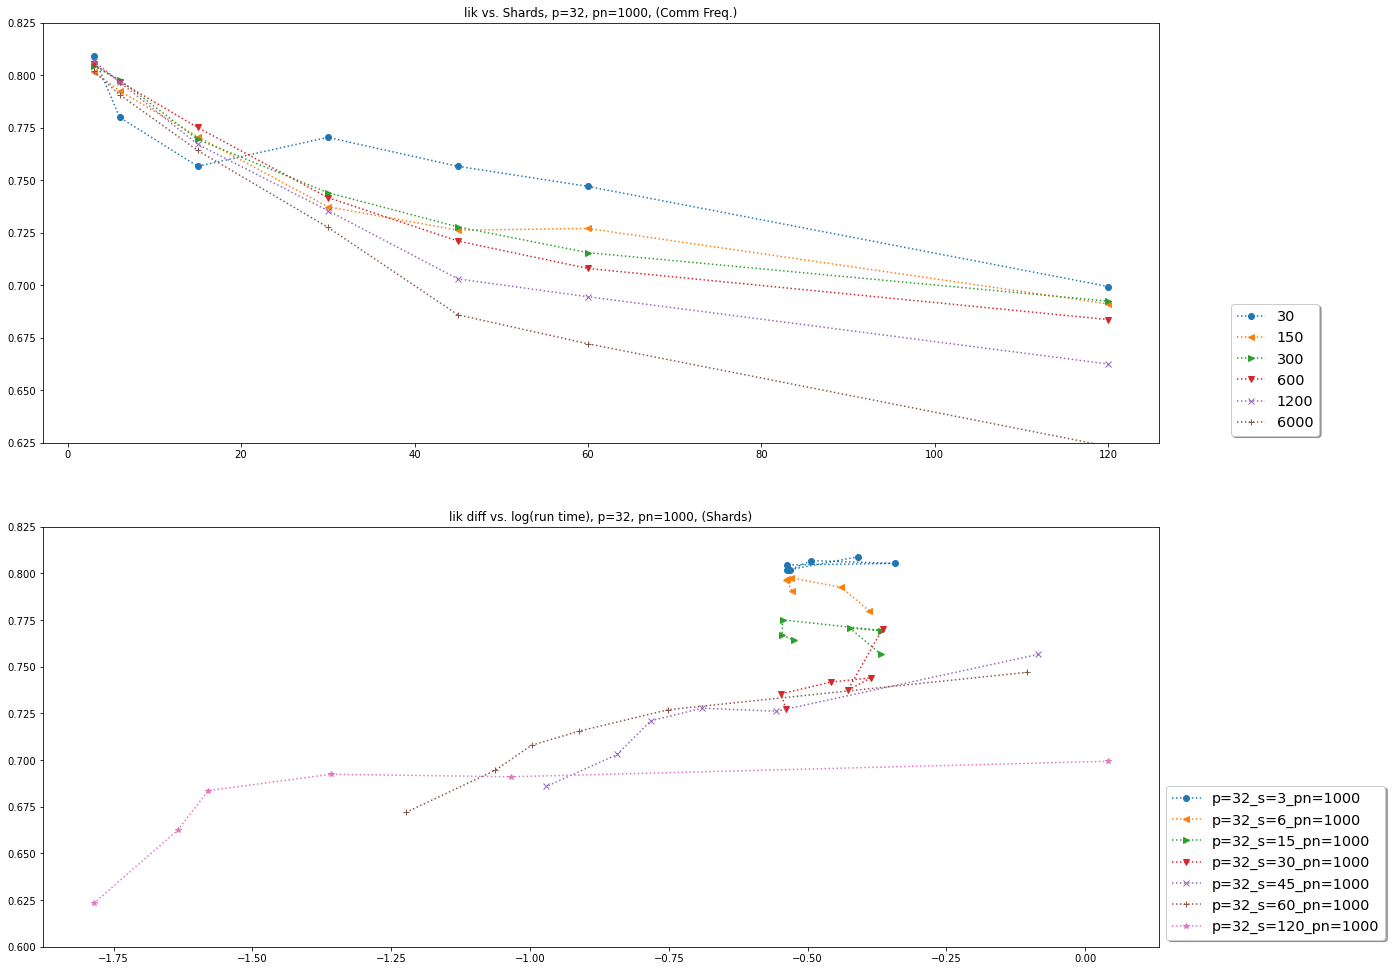

In [65]:
index = rt_32_pn_1000.index.values

plot_names_part_num_1000 = ["p=32" + x for x in names_part_num_1000]

fig = plt.figure(figsize=(20,17))
ax1 = fig.add_subplot(2, 1, 1)

for i in range(len(index)):
    plt.plot(
        shards_for_plots,#np.log(rt_32_pn_1000.loc[index[i], :]/3600), 
        diffs_32_pn_1000.loc[index[i], :],
        symbols_6[i],
        label=str(index[i]),
        
    )
plt.axhline(y=0, color='black', linestyle='-')
_=plt.legend(bbox_to_anchor=(1.15,0),loc='lower right', shadow=True, fontsize='x-large')
_=plt.title("lik vs. Shards, p=32, pn=1000, (Comm Freq.)")
_=plt.ylim((.625,.825))
#legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large', bbox_to_anchor=(1, 0, 5, 2.23))
# Put a nicer background color on the legend.
#legend.get_frame()

ax1 = fig.add_subplot(2, 1, 2)
for i in range(len(names_part_num_1000)):
    plt.plot(
        np.log((pfrt_32_pn_1000+pct_32_pn_1000).loc[:, plot_names_part_num_1000[i]]/3600), 
        diffs_32_pn_1000.loc[:, plot_names_part_num_1000[i]],
        symbols_6[i],
        label=str(plot_names_part_num_1000[i])
    )
plt.axhline(y=0, color='black', linestyle='-')
#_=plt.legend(bbox_to_anchor=(1.04,1), loc='lower right')
_=plt.title("lik diff vs. log(run time), p=32, pn=1000, (Shards)")
_=plt.ylim((.6,.825))

legend = plt.legend(loc='lower left', shadow=True, fontsize='x-large', bbox_to_anchor=(1, 0, 5, 2.23))
# Put a nicer background color on the legend.
legend.get_frame()

In [96]:
def plot_lik_vs_log_run_time(rt, diffs, Y_err, x_err, column_names, p='9999999999', pn="9999999999"):
    symbols_6 = ['o','v', 's', 'p', 'D', '+','^','*','*']
    symbols_conect = ['-.','-.', '-.', '-.', '-.', '-.', '-.','-.', '-.', '-.', '-.', '-.']
    index = rt.index.values
    error_bar_obj = []
    lines_obj = []

    for i in range(len(index)):
        error_bar_obj.append(
            plt.errorbar(
                np.log(rt.loc[index[i], column_names]),#/3600), 
                diffs.loc[index[i], column_names],
                yerr=3*Y_err.loc[index[i], column_names],
                xerr=x_err.loc[index[i], column_names],
                capsize=5,
                capthick=2,
                fmt=symbols_6[i],
                markersize=8,
                label=str(index[i])
            )
        )
    plt.axhline(y=0, color='black', linestyle='-')
    
    for i in range(len(column_names)):
        lines_obj.append(
            plt.plot(
                np.log(rt.loc[:, column_names[i]]),#/3600), 
                diffs.loc[:, column_names[i]],
                symbols_conect[i],
                label=str(column_names[i])
            )
        )
    plt.axhline(y=0, color='black', linestyle='-')
    _=plt.title("avg. lik vs. log(run time) by shard count and obs/epoch, p="+p+", pn="+pn)
    
def plot_lik_vs_log_run_time_v2(rt, diffs, sterr,x_err, column_names, p='9999999999', pn="9999999999"):
    symbols_6 = ['o','v', 's', 'p', 'D', '+','^','*','*']
    symbols_conect = ['-.','-.', '-.', '-.', '-.', '-.', '-.','-.', '-.', '-.', '-.', '-.']
    index = rt.index.values
    error_bar_obj = []
    lines_obj = []

    for i in range(len(index)):
        error_bar_obj.append(
            plt.errorbar(
                np.log(rt.loc[index[i], column_names]),#/3600), 
                diffs.loc[index[i], column_names],
                yerr=3*sterr.loc[index[i], column_names],
                x_err=x_err.loc[index[i], column_names],
                capsize=5,
                capthick=2,
                fmt=symbols_6[i],
                markersize=8,
                label=str(index[i])
            )
        )
    plt.axhline(y=0, color='black', linestyle='-')
    
    for i in range(len(index)):
        error_bar_obj.append(
            plt.errorbar(
                np.log(rt.loc[index[i], column_names]),#/3600), 
                diffs.loc[index[i], column_names],
                yerr=3*sterr.loc[index[i], column_names],
                xerr=x_err.loc[index[i], column_names],
                capsize=5,
                capthick=2,
                fmt=symbols_conect[i],
                markersize=8,
                label=str(index[i])
            )
        )
    
    _=plt.title("avg. lik diff vs. log(run time) by shard count and obs/epoch, p="+p+", pn="+pn)
    


In [91]:
sterr_32_pn_1000

,p=32_s=3_pn=1000,p=32_s=6_pn=1000,p=32_s=15_pn=1000,p=32_s=30_pn=1000,p=32_s=45_pn=1000,p=32_s=60_pn=1000,p=32_s=120_pn=1000
index,,,,,,,
30,0.005102,0.006229,0.011539,0.007987,0.006818,0.007434,0.005884
150,0.005626,0.006804,0.008620,0.008108,0.006149,0.007744,0.005541
300,0.005927,0.005120,0.007666,0.011659,0.008458,0.010521,0.006981
600,0.006009,0.006326,0.007525,0.008185,0.009222,0.008598,0.006573
1200,0.005683,0.007768,0.006178,0.010014,0.011148,0.009418,0.006890
6000,0.007060,0.005855,0.008720,0.008945,0.007608,0.007302,0.005278


In [92]:
get_log_UL_bounds(pfrt_2_pn_1000, pfrt_std_2_pn_1000, 3)

,p=2_s=3_pn=1000,p=2_s=6_pn=1000,p=2_s=15_pn=1000,p=2_s=30_pn=1000,p=2_s=45_pn=1000,p=2_s=60_pn=1000,p=2_s=120_pn=1000
index,,,,,,,
30,0.012034,0.010378,0.007173,0.007957,0.007466,0.006384,0.007570
150,0.012813,0.012525,0.009012,0.007108,0.010468,0.007760,0.004487
300,0.019278,0.013069,0.013267,0.007592,0.010764,0.008245,0.004801
600,0.014117,0.013122,0.007728,0.008778,0.009790,0.016273,0.006576
1200,0.012028,0.009484,0.013963,0.010911,0.012485,0.012552,0.007601
6000,0.005223,0.008755,0.013756,0.013461,0.014118,0.011360,0.005541


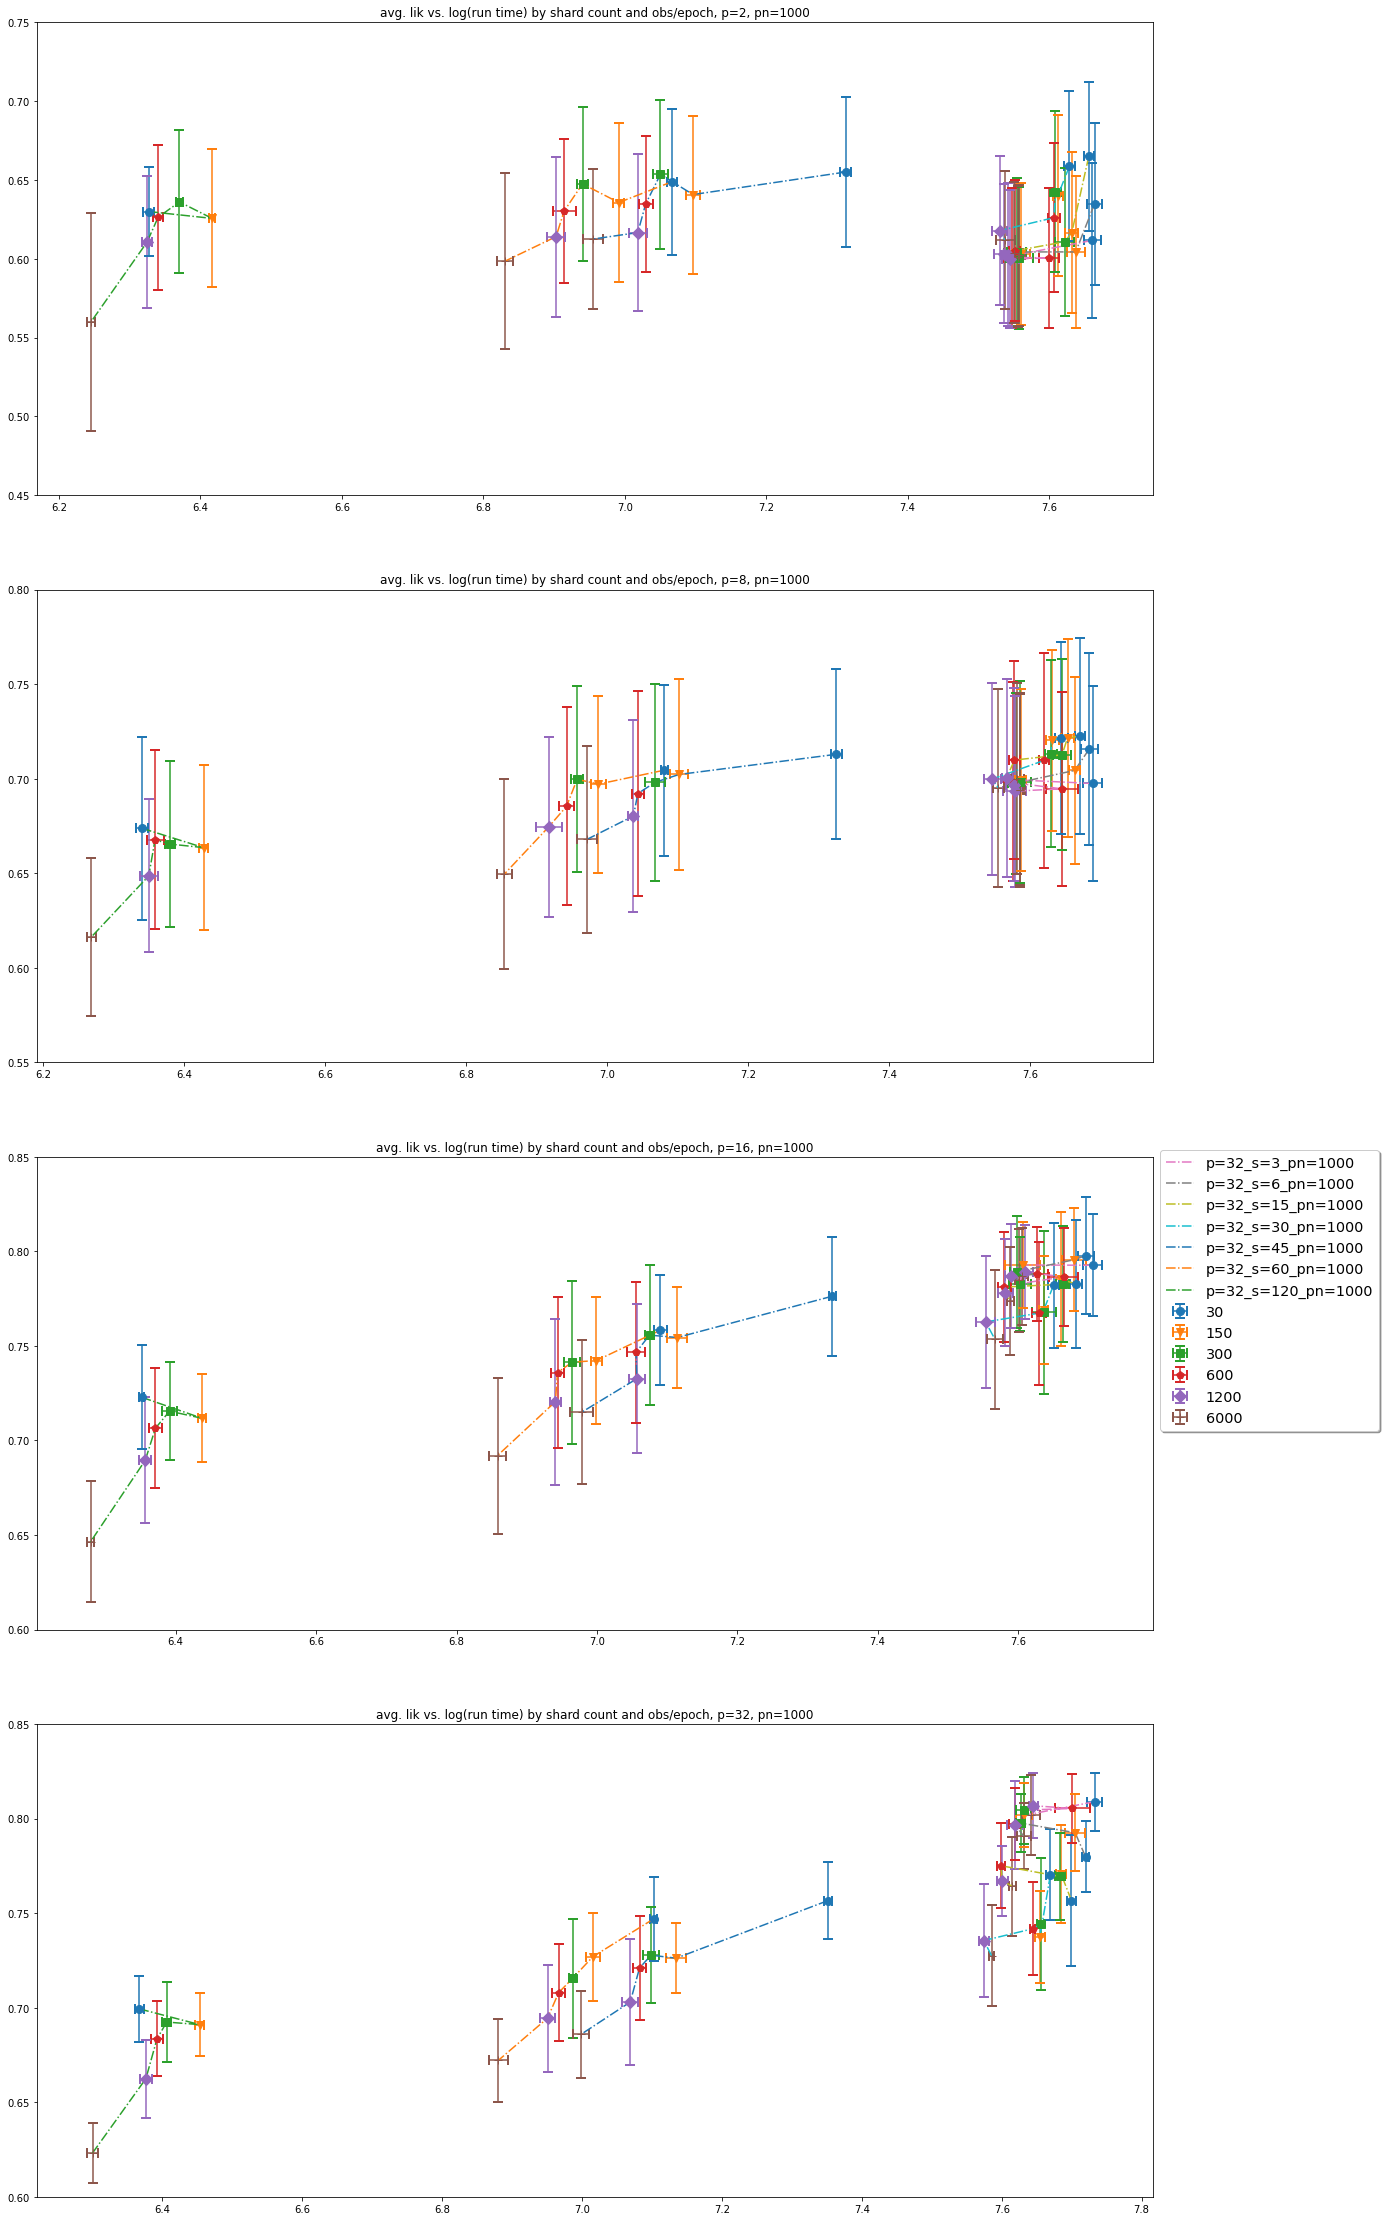

In [93]:
fig = plt.figure(figsize=(20,40))
ax1 = fig.add_subplot(4, 1, 1)
plot_lik_vs_log_run_time(
    pfrt_2_pn_1000, 
    diffs_2_pn_1000, 
    sterr_2_pn_1000,
    x_err=get_log_UL_bounds(pfrt_2_pn_1000, pfrt_std_2_pn_1000, 3),
    column_names=diffs_2_pn_1000.columns, 
    p='2', pn="1000"
)
plt.ylim((.45,.75))

ax1 = fig.add_subplot(4, 1, 2)
plot_lik_vs_log_run_time(
    pfrt_8_pn_1000, 
    diffs_8_pn_1000,
    sterr_8_pn_1000,
    x_err=get_log_UL_bounds(pfrt_8_pn_1000, pfrt_std_8_pn_1000, 3),
    column_names=diffs_8_pn_1000.columns,
    p='8', pn="1000"
)
plt.ylim((.55,.8))

ax1 = fig.add_subplot(4, 1, 3)
plot_lik_vs_log_run_time(
    pfrt_16_pn_1000, 
    diffs_16_pn_1000,
    sterr_16_pn_1000,
    x_err=get_log_UL_bounds(pfrt_16_pn_1000, pfrt_std_16_pn_1000, 3),
    column_names=diffs_16_pn_1000.columns,
    p='16', pn="1000"
)
plt.ylim((.6,.85))

ax1 = fig.add_subplot(4, 1, 4)
plot_lik_vs_log_run_time(
    pfrt_32_pn_1000, 
    diffs_32_pn_1000,
    sterr_32_pn_1000,
    x_err=get_log_UL_bounds(pfrt_32_pn_1000, pfrt_std_32_pn_1000, 3),
    column_names=diffs_32_pn_1000.columns,
    p='32', pn="1000"
)
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large', bbox_to_anchor=(1, 0, 5, 2.23))
# Put a nicer background color on the legend.
legend.get_frame()#.set_facecolor('C0')
plt.ylim((.6,.85))
plt.show()

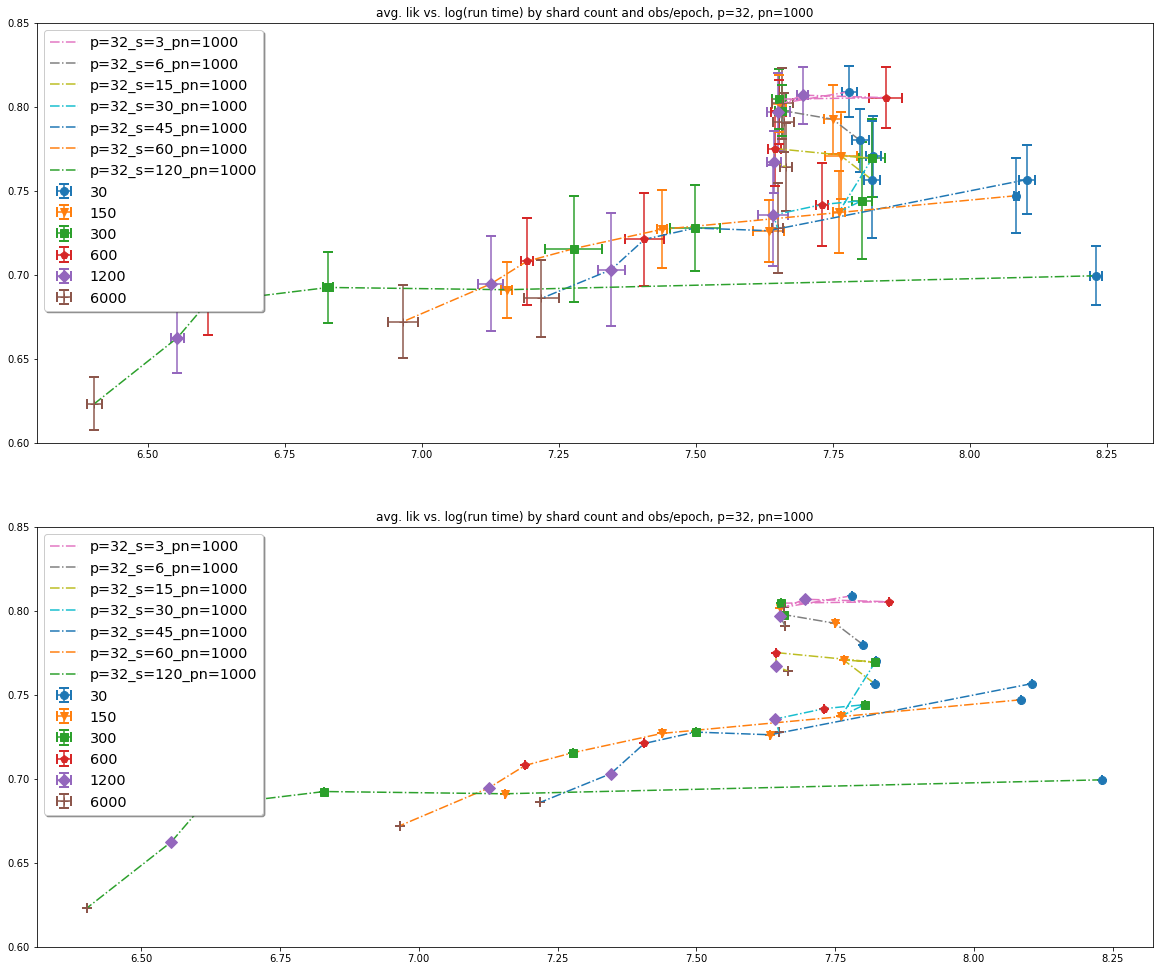

In [94]:
fig = plt.figure(figsize=(20,17))
#ax1 = fig.add_subplot(4, 1, 1)
#plot_lik_vs_log_run_time(
#    pfrt_2_pn_1000+pct_2_pn_1000, 
#    diffs_2_pn_1000, 
#    sterr_2_pn_1000, 
#    column_names=diffs_2_pn_1000.columns, 
#    p='2', pn="1000"
#)
#plt.ylim((.45,.75))
#
#ax1 = fig.add_subplot(4, 1, 2)
#plot_lik_vs_log_run_time(
#    pfrt_8_pn_1000+pct_8_pn_1000, 
#    diffs_8_pn_1000,
#    sterr_8_pn_1000,
#    column_names=diffs_8_pn_1000.columns,
#    p='8', pn="1000"
#)
#plt.ylim((.6,.85))
#
#ax1 = fig.add_subplot(4, 1, 3)
#plot_lik_vs_log_run_time(
#    pfrt_16_pn_1000+pct_16_pn_1000, 
#    diffs_16_pn_1000,
#    sterr_16_pn_1000,
#    column_names=diffs_16_pn_1000.columns,
#    p='16', pn="1000"
#)
#plt.ylim((.6,.85))

ax1 = fig.add_subplot(2, 1, 1)
plot_lik_vs_log_run_time(
    pfrt_32_pn_1000+pct_32_pn_1000, 
    diffs_32_pn_1000,
    sterr_32_pn_1000,
    x_err=get_log_UL_bounds(
        pfrt_32_pn_1000+pct_32_pn_1000, 
        np.sqrt(pfrt_std_32_pn_1000**2 + pct_std_32_pn_1000**2), 3),
    column_names=diffs_32_pn_1000.columns,
    p='32', pn="1000"
)
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')#, bbox_to_anchor=(1, 0, 5, 2.23))
# Put a nicer background color on the legend.
legend.get_frame()#.set_facecolor('C0')
plt.ylim((.6,.85))

ax1 = fig.add_subplot(2, 1, 2)
plot_lik_vs_log_run_time(
    pfrt_32_pn_1000+pct_32_pn_1000, 
    diffs_32_pn_1000,
    Y_err=0*sterr_32_pn_1000,
    x_err=0*get_log_UL_bounds(
        pfrt_32_pn_1000+pct_32_pn_1000, 
        np.sqrt(pfrt_std_32_pn_1000**2 + pct_std_32_pn_1000**2), 3),
    column_names=diffs_32_pn_1000.columns,
    p='32', pn="1000"
)
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')#, bbox_to_anchor=(1, 0, 5, 2.23))
# Put a nicer background color on the legend.
legend.get_frame()#.set_facecolor('C0')
plt.ylim((.6,.85))
plt.show()

ValueError: num must be 1 <= num <= 6, not 7

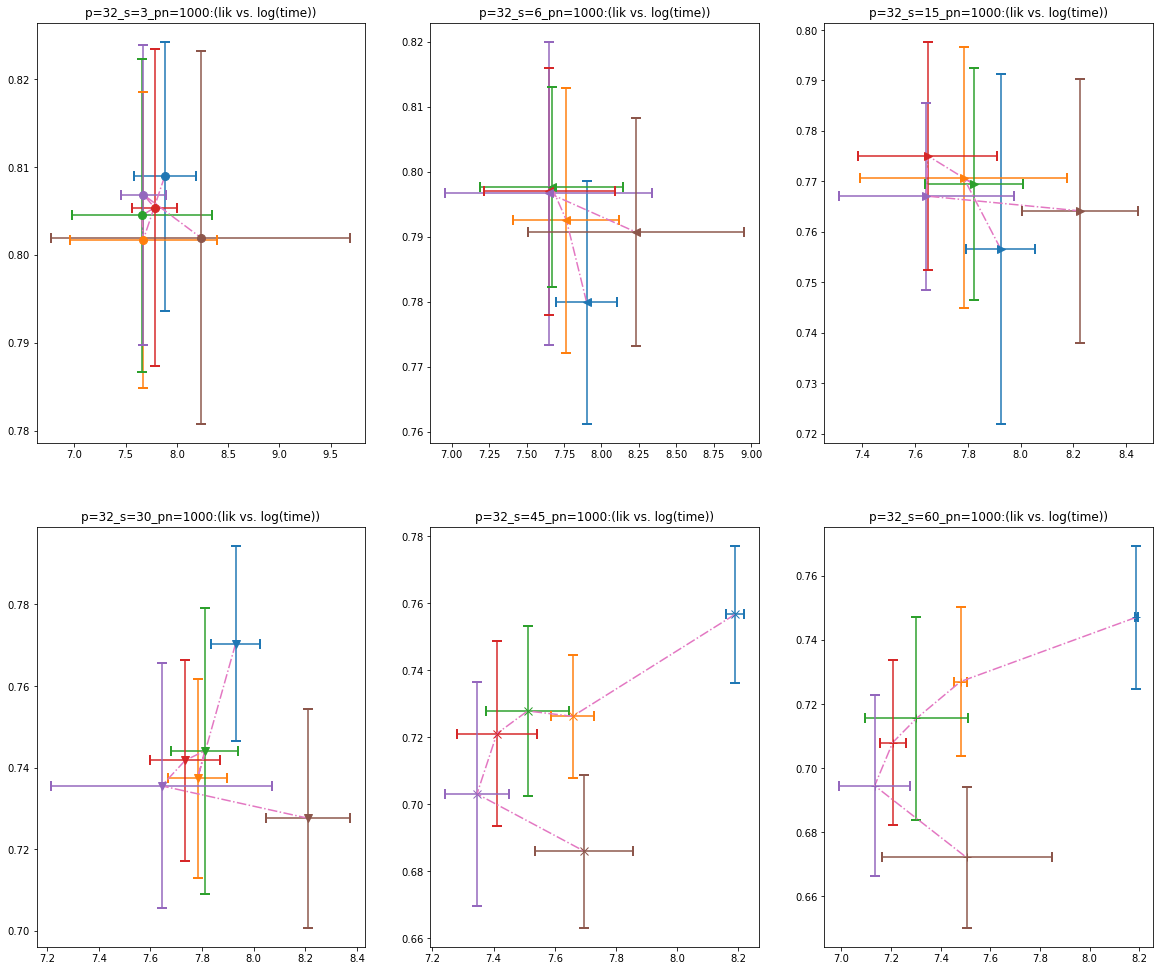

In [102]:
def plot_lik_vs_log_run_time_single(rt, diffs, sterr, x_err, column_names, p='9999999999', pn="9999999999"):
    #symbols_6 = ['o','v', 's', 'p', 'D', '+','^','*','*']
    symbols_conect = ['-.','-.', '-.', '-.', '-.', '-.', '-.','-.', '-.', '-.', '-.', '-.']
    index = rt.index.values
    error_bar_obj = []
    lines_obj = []

    fig = plt.figure(figsize=(20,17))
    for i in range(len(column_names)):

        ax1 = fig.add_subplot(2, 3, i+1)
        for j in range(len(index)):
            plt.errorbar(
                np.log(rt.loc[index[j], column_names[i]]), 
                diffs.loc[index[j], column_names[i]],
                yerr=3*sterr.loc[index[j], column_names[i]],
                xerr=x_err.loc[index[j], column_names[i]],
                #symbols_conect[i],
                capsize=5,
                capthick=2,
                fmt=symbols_6[i],
                markersize=8,
                label=str(column_names[i])
            )
        plt.plot(
            np.log(rt.loc[:, column_names[i]]), 
            diffs.loc[:, column_names[i]],
            symbols_conect[i],
            label=str(column_names[i])
        )
        _=plt.title(str(column_names[i]) + ":(lik vs. log(time))")

plot_lik_vs_log_run_time_single(
    rt_32_pn_1000+pct_32_pn_1000, 
    diffs_32_pn_1000,
    sterr_32_pn_1000,
    x_err=get_log_UL_bounds(
        pct_32_pn_1000, np.sqrt(pfrt_std_32_pn_1000**2 + pct_std_32_pn_1000**2), 3),
    column_names=diffs_32_pn_1000.columns,
    p='32', pn="1000"
)

In [25]:
#def lik_vs_pred_num(column_names, pn):
#    colors = ['y','g','r','c','m','b','k',]
#    symbols = ['o','<', '>', 'D', 'x', '+']
#    shards = [3,15,45,60,120]#[3,6,10,15,30,60]
#    
#        
#    diffs_list = [diffs_2_pn_1000, diffs_8_pn_1000, diffs_16_pn_1000, diffs_32_pn_1000]
#    rt_list=[rt_2_pn_1000, rt_8_pn_1000, rt_16_pn_1000, rt_32_pn_1000]
#    
#    fig = plt.figure(figsize=(20,10))
#    #array([  30,  150,  300,  600, 1200])
#    index = diffs_2_pn_1000.index.values
#    for cn in range(len(column_names)):
#        ax1 = fig.add_subplot(2, 3, cn+1)
#
#        for ind in range(len(index)):
#            by_pred = np.zeros(4)
#            for bp in range( len(diffs_list)):
#                print(diffs_list[bp])
#                by_pred[bp] = diffs_list[bp].loc[index[ind], column_names[cn]]
#            
#            plt.plot(
#                by_pred,
#                '-.'+symbols[ind],
#                color=colors[cn],
#                markersize=8,
#                label = column_names[cn] + ', obs/epoch=' + str(index[ind])
#            )
#        plt.legend(fontsize='small')
#        _=plt.title("lik vs. #P by obs/epoch for shard="+str(shards[cn]) +", pn="+pn)
#        
#        plt.axhline(y=0, color='black', linestyle='-')
#        pred_num = [2,8,16,32]
#        ind = np.arange(len(pred_num))
#        plt.xticks(ind, pred_num)
#        plt.ylim((-.04, .07))
#        #legend = plt.legend(loc='upper left', shadow=True, fontsize='medium', bbox_to_anchor=(1, 0, 5, 1))
#    
#    

In [26]:
#lik_vs_pred_num(column_names=names_part_num_1000, pn="1000")
#lik_vs_pred_num(column_names=names_part_num_100, pn="100")
#lik_vs_pred_num(column_names=names_part_num_20, pn="20")

In [82]:
def plot_log_run_time_vs_comm_by_shard(rt, column_names, p='9999999999', pn="9999999999", title=''):
    #symbols_6 = [':o',':v', ':s', ':p', ':D', ':+']
    symbols_conect = ['-.','-.', '-.', '-.', '-.', '-.']
    
    for i in range(len(index)):
        plt.plot(
            [3,6,15,30,45,60,120],
            np.log(rt.loc[index[i], column_names]/3600), 
            #diffs.loc[index[i], column_names],
            #yerr=0.01,
            #capsize=5,
            #capthick=2,
            symbols_6[i],
            markersize=8,
            label=str(index[i])+" obs./epoch"
        )
    plt.xticks([3,6,15,30,45,60,120])
    #plt.axhline(y=0, color='black', linestyle='-')
    _=plt.title(title+"\n p="+p+", particle count="+pn)
    plt.legend(fontsize='small')


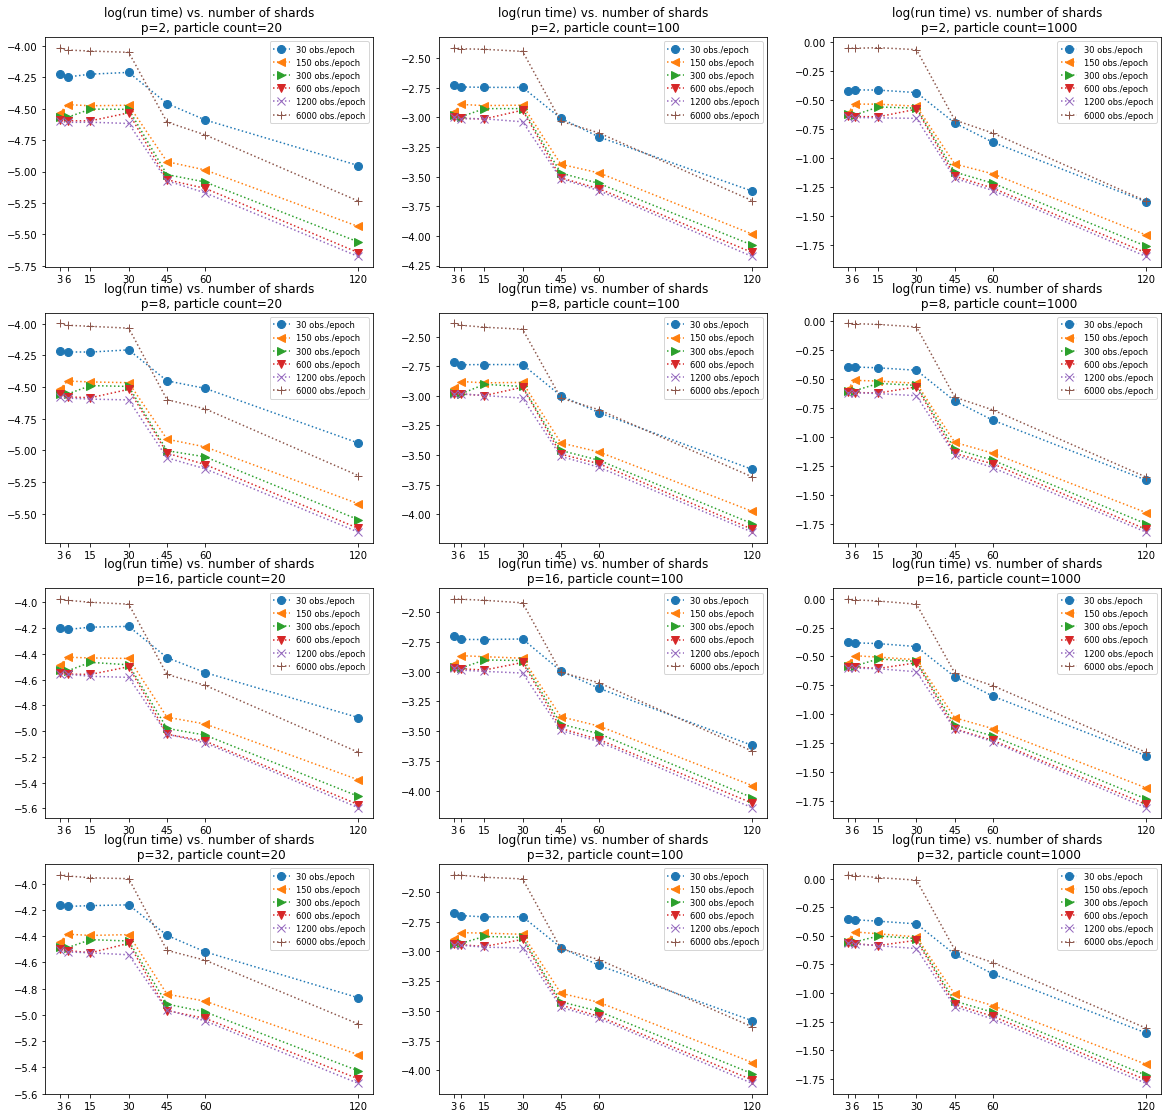

In [84]:
fig = plt.figure(figsize=(20,60))
ax1 = fig.add_subplot(12, 3, 1)
plot_log_run_time_vs_comm_by_shard(rt_2_pn_20, column_names=rt_2_pn_20.columns,p='2', pn="20", title="log(run time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 2)
plot_log_run_time_vs_comm_by_shard(rt_2_pn_100, column_names=rt_2_pn_100.columns,p='2', pn="100", title="log(run time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 3)
plot_log_run_time_vs_comm_by_shard(rt_2_pn_1000, column_names=rt_2_pn_1000.columns,p='2', pn="1000", title="log(run time) vs. number of shards")

#fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(12, 3, 4)
plot_log_run_time_vs_comm_by_shard(rt_8_pn_20, column_names=rt_8_pn_20.columns,p='8', pn="20", title="log(run time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 5)
plot_log_run_time_vs_comm_by_shard(rt_8_pn_100, column_names=rt_8_pn_100.columns,p='8', pn="100", title="log(run time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 6)
plot_log_run_time_vs_comm_by_shard(rt_8_pn_1000, column_names=rt_8_pn_1000.columns,p='8', pn="1000", title="log(run time) vs. number of shards")

#fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(12, 3, 7)
plot_log_run_time_vs_comm_by_shard(rt_16_pn_20, column_names=rt_16_pn_20.columns,p='16', pn="20", title="log(run time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 8)
plot_log_run_time_vs_comm_by_shard(rt_16_pn_100, column_names=rt_16_pn_100.columns,p='16', pn="100", title="log(run time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 9)
plot_log_run_time_vs_comm_by_shard(rt_16_pn_1000, column_names=rt_16_pn_1000.columns,p='16', pn="1000", title="log(run time) vs. number of shards")

#fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(12, 3, 10)
plot_log_run_time_vs_comm_by_shard(rt_32_pn_20, column_names=rt_32_pn_20.columns,p='32', pn="20", title="log(run time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 11)
plot_log_run_time_vs_comm_by_shard(rt_32_pn_100, column_names=rt_32_pn_100.columns,p='32', pn="100", title="log(run time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 12)
plot_log_run_time_vs_comm_by_shard(rt_32_pn_1000, column_names=rt_32_pn_1000.columns,p='32', pn="1000", title="log(run time) vs. number of shards")


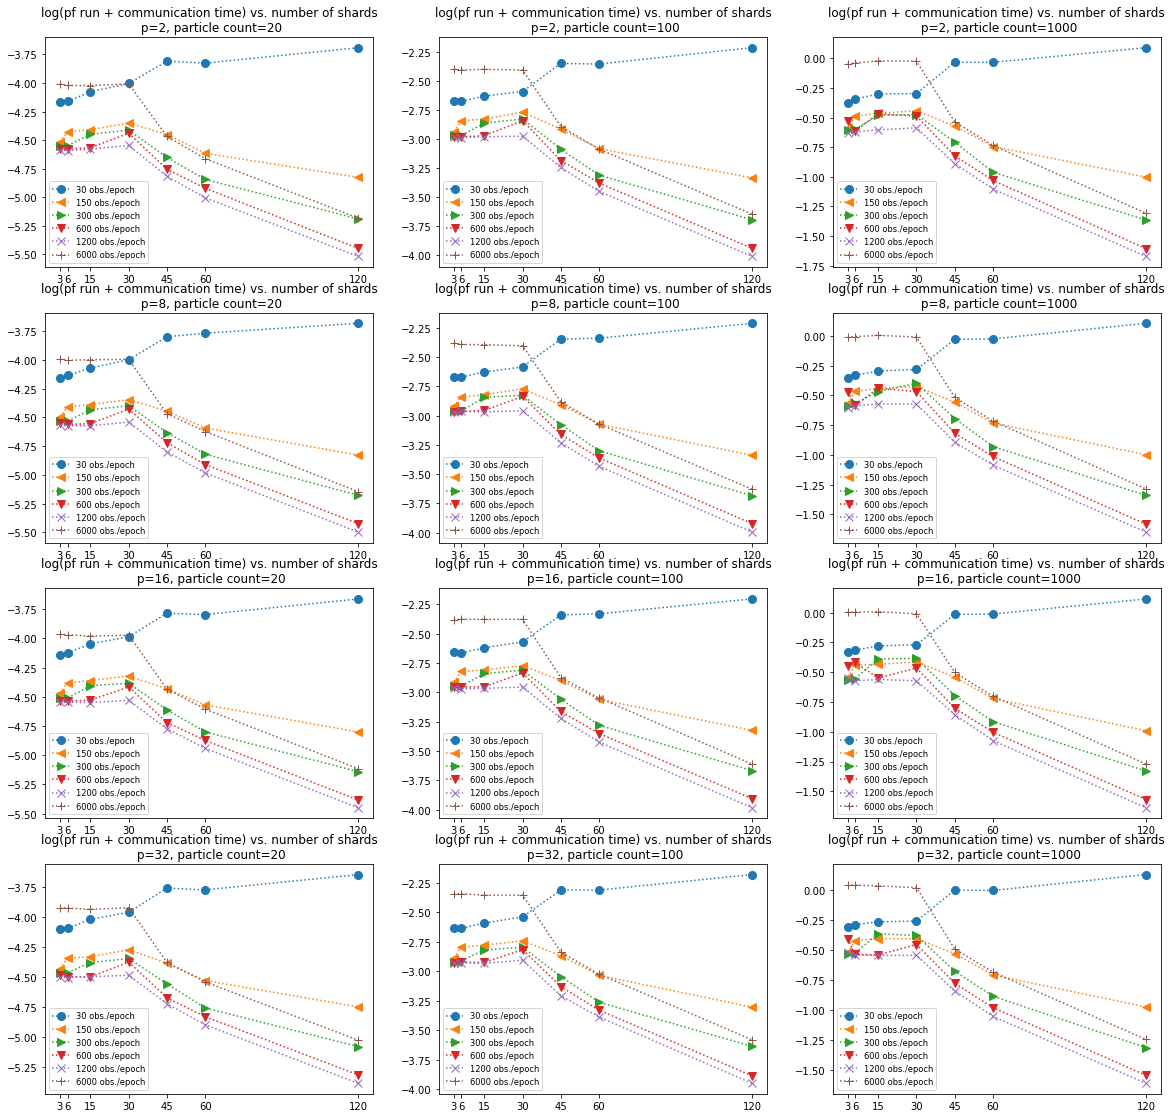

In [87]:
fig = plt.figure(figsize=(20,60))
ax1 = fig.add_subplot(12, 3, 1)
plot_log_run_time_vs_comm_by_shard(rt_2_pn_20+pct_2_pn_20, column_names=rt_2_pn_20.columns,p='2', pn="20", title="log(pf run + communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 2)
plot_log_run_time_vs_comm_by_shard(rt_2_pn_100+pct_2_pn_100, column_names=rt_2_pn_100.columns,p='2', pn="100", title="log(pf run + communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 3)
plot_log_run_time_vs_comm_by_shard(rt_2_pn_1000+pct_2_pn_1000, column_names=rt_2_pn_1000.columns,p='2', pn="1000", title="log(pf run + communication time) vs. number of shards")

#fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(12, 3, 4)
plot_log_run_time_vs_comm_by_shard(rt_8_pn_20+pct_8_pn_20, column_names=rt_8_pn_20.columns,p='8', pn="20", title="log(pf run + communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 5)
plot_log_run_time_vs_comm_by_shard(rt_8_pn_100+pct_8_pn_100, column_names=rt_8_pn_100.columns,p='8', pn="100", title="log(pf run + communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 6)
plot_log_run_time_vs_comm_by_shard(rt_8_pn_1000+pct_8_pn_1000, column_names=rt_8_pn_1000.columns,p='8', pn="1000", title="log(pf run + communication time) vs. number of shards")

#fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(12, 3, 7)
plot_log_run_time_vs_comm_by_shard(rt_16_pn_20+pct_16_pn_20, column_names=rt_16_pn_20.columns,p='16', pn="20", title="log(pf run + communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 8)
plot_log_run_time_vs_comm_by_shard(rt_16_pn_100+pct_16_pn_100, column_names=rt_16_pn_100.columns,p='16', pn="100", title="log(pf run + communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 9)
plot_log_run_time_vs_comm_by_shard(rt_16_pn_1000+pct_16_pn_1000, column_names=rt_16_pn_1000.columns,p='16', pn="1000", title="log(pf run + communication time) vs. number of shards")

#fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(12, 3, 10)
plot_log_run_time_vs_comm_by_shard(rt_32_pn_20+pct_32_pn_20, column_names=rt_32_pn_20.columns,p='32', pn="20", title="log(pf run + communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 11)
plot_log_run_time_vs_comm_by_shard(rt_32_pn_100+pct_32_pn_100, column_names=rt_32_pn_100.columns,p='32', pn="100", title="log(pf run + communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 12)
plot_log_run_time_vs_comm_by_shard(rt_32_pn_1000+pct_32_pn_1000, column_names=rt_32_pn_1000.columns,p='32', pn="1000", title="log(pf run + communication time) vs. number of shards")


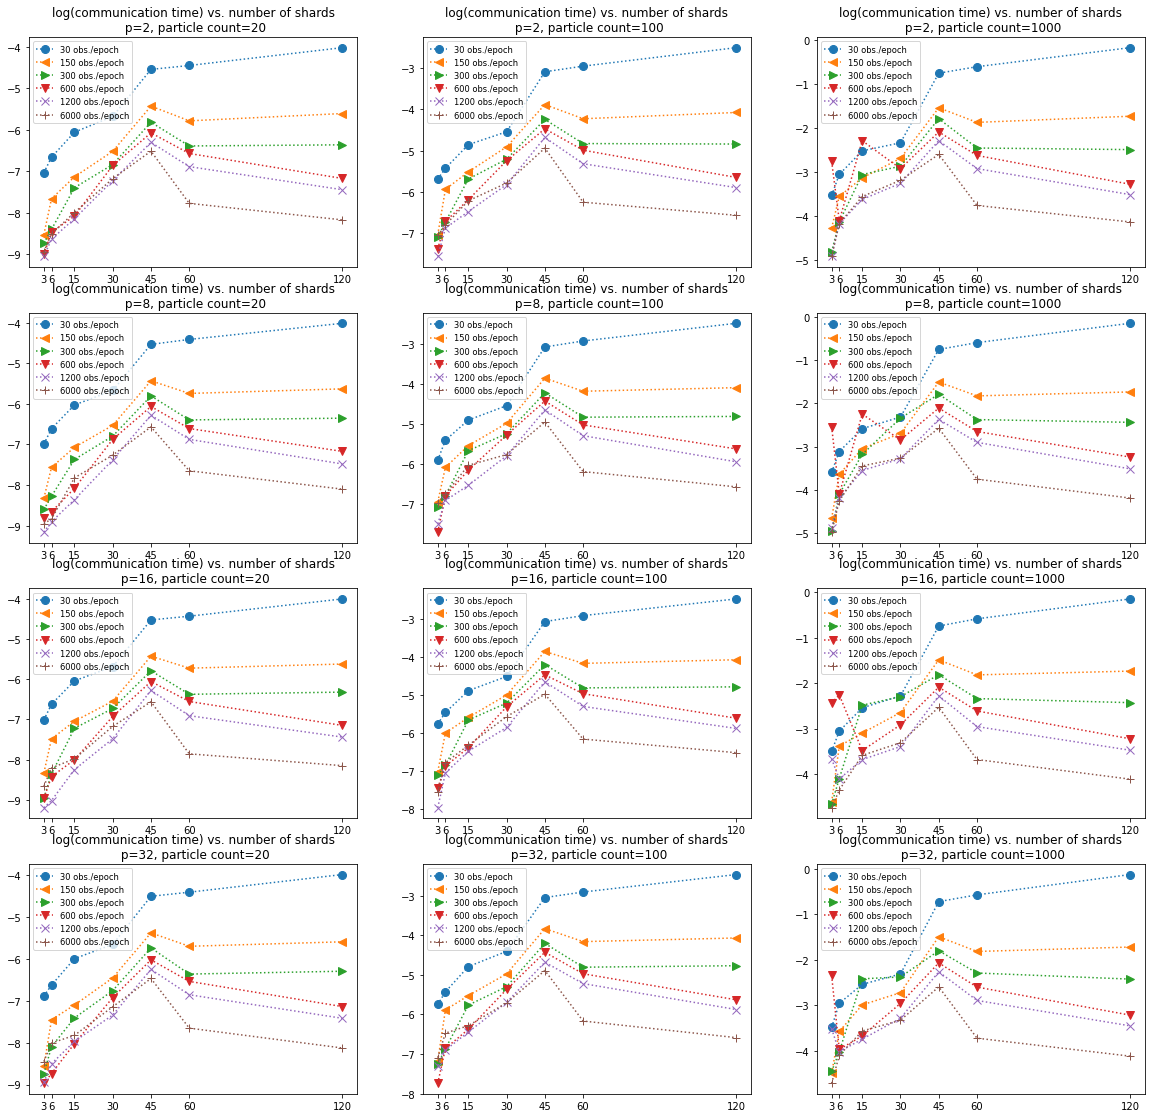

In [89]:
fig = plt.figure(figsize=(20,60))
ax1 = fig.add_subplot(12, 3, 1)
plot_log_run_time_vs_comm_by_shard(pct_2_pn_20, column_names=rt_2_pn_20.columns,p='2', pn="20", title="log(communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 2)
plot_log_run_time_vs_comm_by_shard(pct_2_pn_100, column_names=rt_2_pn_100.columns,p='2', pn="100", title="log(communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 3)
plot_log_run_time_vs_comm_by_shard(pct_2_pn_1000, column_names=rt_2_pn_1000.columns,p='2', pn="1000", title="log(communication time) vs. number of shards")

#fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(12, 3, 4)
plot_log_run_time_vs_comm_by_shard(pct_8_pn_20, column_names=rt_8_pn_20.columns,p='8', pn="20", title="log(communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 5)
plot_log_run_time_vs_comm_by_shard(pct_8_pn_100, column_names=rt_8_pn_100.columns,p='8', pn="100", title="log(communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 6)
plot_log_run_time_vs_comm_by_shard(pct_8_pn_1000, column_names=rt_8_pn_1000.columns,p='8', pn="1000", title="log(communication time) vs. number of shards")

#fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(12, 3, 7)
plot_log_run_time_vs_comm_by_shard(pct_16_pn_20, column_names=rt_16_pn_20.columns,p='16', pn="20", title="log(communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 8)
plot_log_run_time_vs_comm_by_shard(pct_16_pn_100, column_names=rt_16_pn_100.columns,p='16', pn="100", title="log(communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 9)
plot_log_run_time_vs_comm_by_shard(pct_16_pn_1000, column_names=rt_16_pn_1000.columns,p='16', pn="1000", title="log(communication time) vs. number of shards")

#fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(12, 3, 10)
plot_log_run_time_vs_comm_by_shard(pct_32_pn_20, column_names=rt_32_pn_20.columns,p='32', pn="20", title="log(communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 11)
plot_log_run_time_vs_comm_by_shard(pct_32_pn_100, column_names=rt_32_pn_100.columns,p='32', pn="100", title="log(communication time) vs. number of shards")
ax1 = fig.add_subplot(12, 3, 12)
plot_log_run_time_vs_comm_by_shard(pct_32_pn_1000, column_names=rt_32_pn_1000.columns,p='32', pn="1000", title="log(communication time) vs. number of shards")
